**Analiza błędów**

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from fractions import Fraction

**Zadanie 1.**

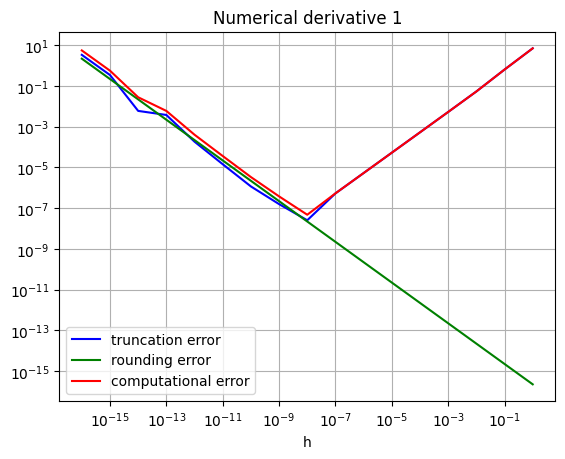

In [12]:
f = np.vectorize(lambda h: (np.tan(1+h)-np.tan(1))/h)
h = np.array([np.double(10**-k) for k in range(17)])
approximate_value_vect = f(h)
real_value = 1 + np.tan(1)**2
trunc_error = np.abs(approximate_value_vect-real_value)
e_mach = np.double(2**-53)
roundoff_error = 2*e_mach/h

plt.yscale("log")
plt.xscale("log")
plt.xlabel('h')
plt.title("Numerical derivative 1")

plt.plot(h, trunc_error, 'b', label="truncation error")
plt.plot(h, roundoff_error, 'g', label="rounding error")
plt.plot(h, trunc_error+roundoff_error, 'r', label="computational error")
plt.legend()

plt.grid(True)
plt.show()


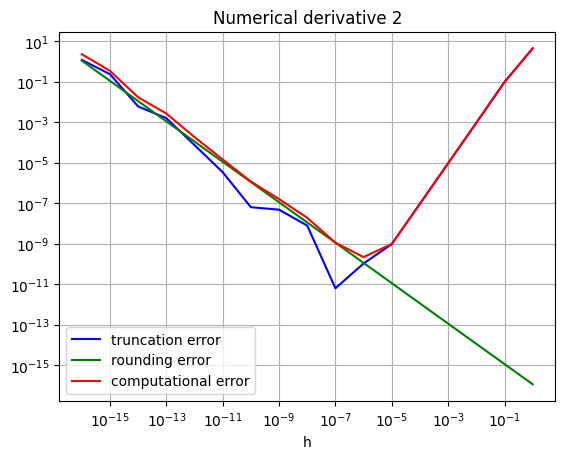

In [13]:
f = np.vectorize(lambda h: (np.tan(1+h)-np.tan(1-h))/(2*h))
h = np.array([np.double(10**-k) for k in range(17)])
approximate_value_vect = f(h)
real_value = 1 + np.tan(1)**2
trunc_error = np.abs(approximate_value_vect-real_value)
e_mach = np.double(2**-53)
roundoff_error = e_mach/h
plt.yscale("log")
plt.xscale("log")
plt.xlabel('h')
plt.title("Numerical derivative 2")


plt.plot(h, trunc_error, 'b', label="truncation error")
plt.plot(h, roundoff_error, 'g', label="rounding error")
plt.plot(h, trunc_error+roundoff_error, 'r', label="computational error")
plt.legend()

plt.grid(True)
plt.show()

**Zadanie 2.**

C:\Users\leymk\AppData\Local\Temp\ipykernel_14056\3214650005.py:6: RuntimeWarning: overflow encountered in scalar multiply
  x[i] = np.array([np.single(2.25)*x[i-1][0] - np.single(0.5)*x[i-2][0],
C:\Users\leymk\AppData\Local\Temp\ipykernel_14056\3214650005.py:6: RuntimeWarning: invalid value encountered in scalar subtract
  x[i] = np.array([np.single(2.25)*x[i-1][0] - np.single(0.5)*x[i-2][0],


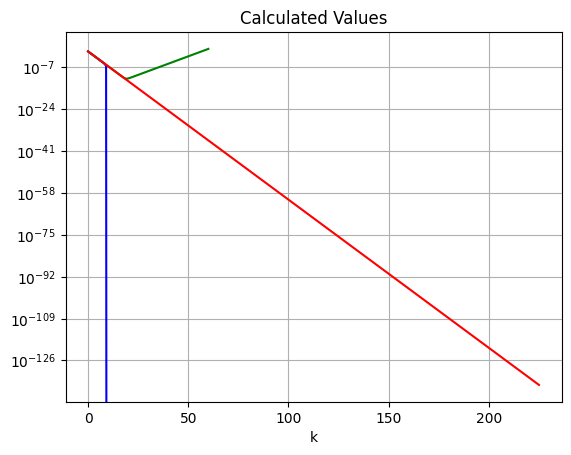

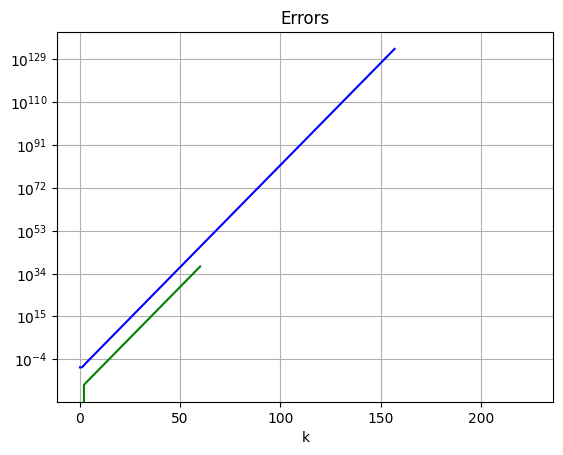

In [14]:
x = [None for _ in range(226)]

x[0] = np.array([np.single(1/3),np.double(1/3),Fraction(1, 3)])
x[1] = np.array([np.single(1/12),np.double(1/12),Fraction(1, 12)])
for i in range(2,226):
    x[i] = np.array([np.single(2.25)*x[i-1][0] - np.single(0.5)*x[i-2][0],
    np.double(2.25)*x[i-1][1] - np.double(0.5)*x[i-2][1],
    Fraction(9,4)*x[i-1][2] - Fraction(1,2)*x[i-2][2]])

x = np.array(x)
k = np.array([i for i in range(226)])
real_values = np.array([np.double(1/3 * 4**-i) for i in range(226)])

# Calculated Values:

plt.yscale("log")
plt.xlabel('k')
plt.title("Calculated Values")

# Single precision, n = 225
plt.plot(k, x[:,0], 'b')
# Double precision, n = 60
plt.plot(k[:61], x[:61,1], 'g')
# Fraction representation, n = 225
plt.plot(k, x[:,2], 'r')
# Real value
# plt.plot(k, real_values, 'purple')

plt.grid(True)
plt.show()

# Errors:

plt.yscale("log")
plt.xlabel('k')
plt.title("Errors")

# Single precision, n = 225
plt.plot(k, np.abs((x[:,0]-real_values)/real_values), 'b')
# Double precision, n = 60
plt.plot(k[:61], np.abs((x[:61,1]-real_values[:61])/real_values[:61]), 'g')
# Fraction representation, n = 225
plt.plot(k, np.abs((x[:,2]-real_values)/real_values), 'r')

plt.grid(True)
plt.show()
